# Importing Libraries

In [270]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

In [271]:
#load the dataset

hotel_data = pd.read_csv(r'c:\Users\User\Downloads\hotel_booking.csv.zip')
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [272]:
#check the shape of the dataset
hotel_data.shape

(119390, 36)

In [273]:
#chek the columns of the dataset
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [274]:
#check the information of the dataset
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [275]:
hotel_data['reservation_status_date'] = pd.DatetimeIndex(hotel_data['reservation_status_date'])

In [276]:
#check the summary statistics of the dataset
hotel_data.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [277]:
#check for unique values in the dataset
for col in hotel_data.columns:
    if hotel_data[col].dtype == 'object':
        print(f'{col} : {hotel_data[col].unique()}')
        print('_'*50)

hotel : ['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 

In [278]:
#check for missing values
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [279]:
# Drop columns only if they exist in the DataFrame
columns_to_drop = ['company', 'agent']
existing_columns = [col for col in columns_to_drop if col in hotel_data.columns]
hotel_data.drop(existing_columns, axis=1, inplace=True)

# Drop rows with missing values
hotel_data.dropna(inplace=True)

In [280]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [281]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


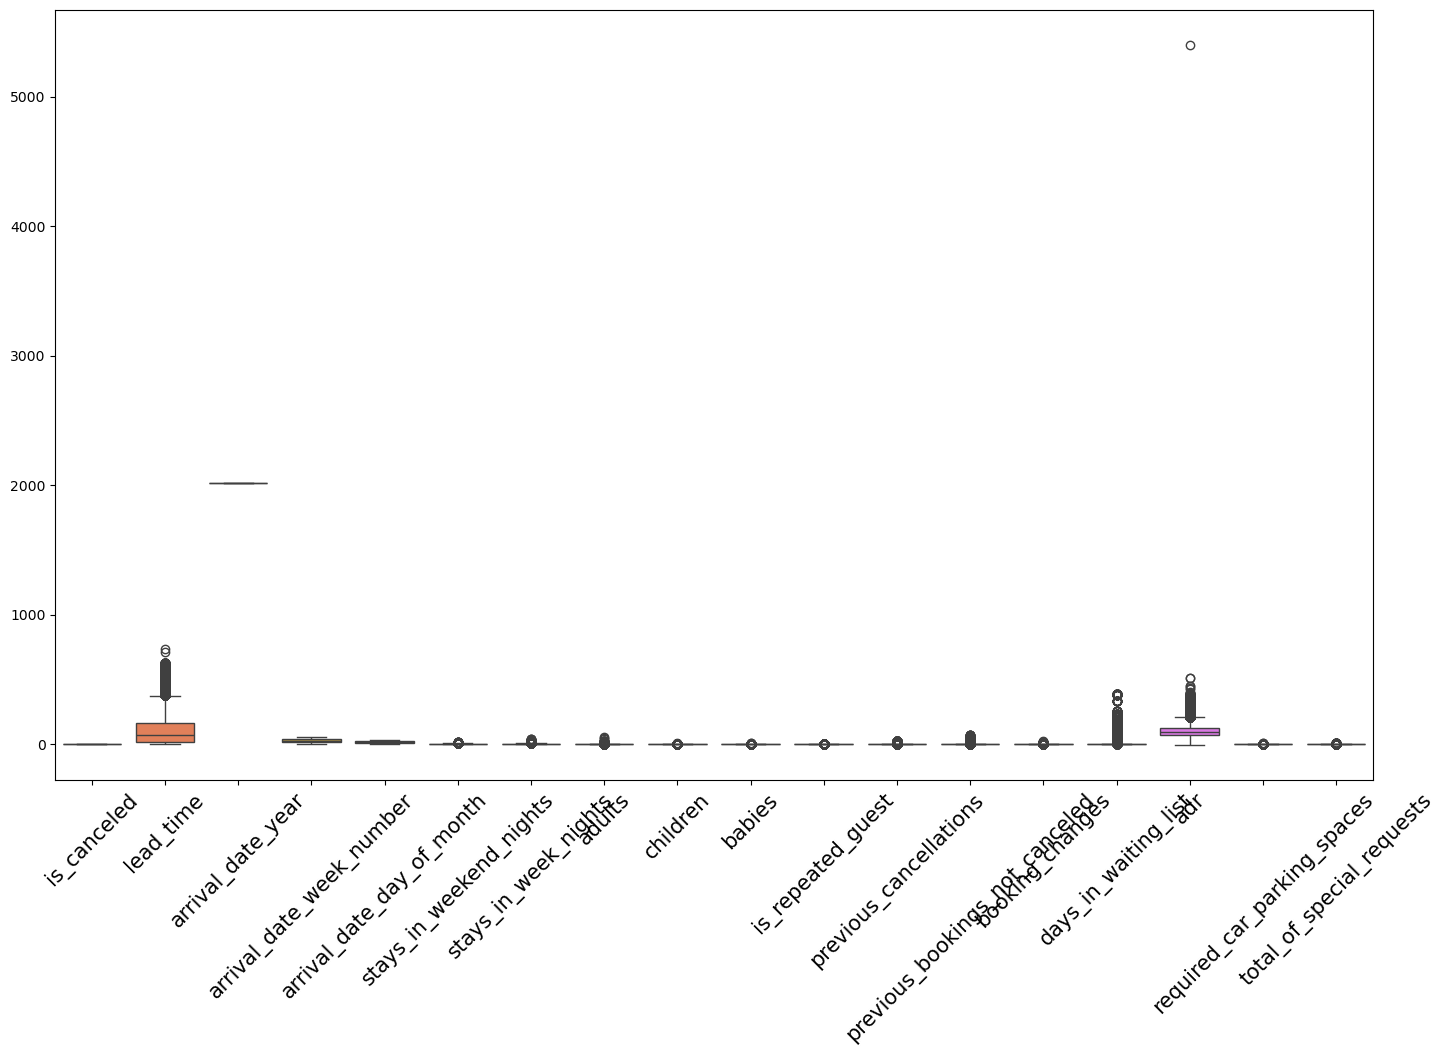

In [282]:
#dispaly outliers in the dataset
plt.figure(figsize=(17,10))
sns.boxplot(data=hotel_data)
plt.xticks(rotation=45)
plt.show()

In [283]:
#remove outliers in the dataset
hotel_data = hotel_data[hotel_data['adr'] < 5000]

In [284]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis and Visualization

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


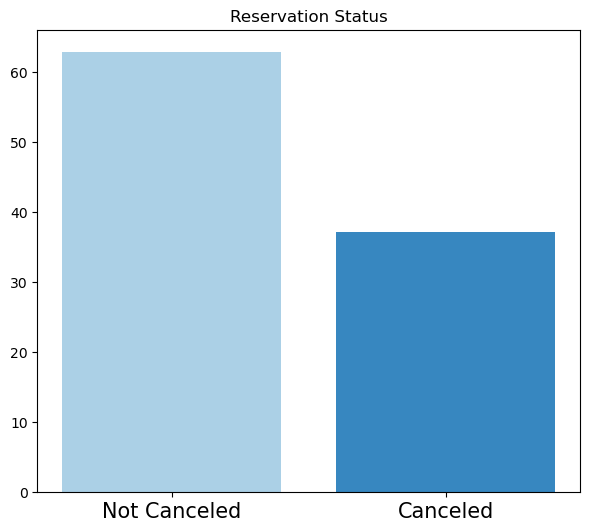

In [285]:
#plotting a graph for reservation status
canceled_percentage = hotel_data['is_canceled'].value_counts(normalize=True)
print(canceled_percentage)

plt.figure(figsize=(7,6))
plt.title('Reservation Status')
plt.bar(canceled_percentage.index, canceled_percentage.values * 100, color=['grey', 'blue'][:len(canceled_percentage)])
plt.bar(canceled_percentage.index, canceled_percentage.values * 100, color=sns.color_palette("Blues", len(canceled_percentage)))
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

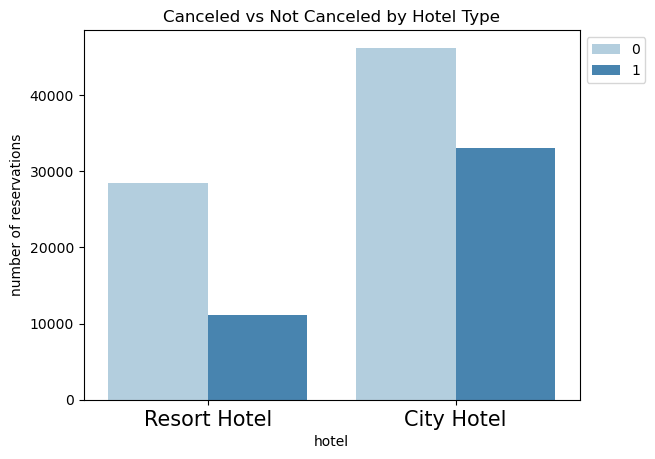

In [286]:
plt.Figure(figsize=(10,6))
ax1 = sns.countplot(data=hotel_data, x='hotel', hue='is_canceled' , palette='Blues')
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Canceled vs Not Canceled by Hotel Type')
plt.ylabel('number of reservations')
plt.show()

In [287]:
#percentage of cancelation by hotel type
resort_hotel = hotel_data[hotel_data['hotel'] == 'Resort Hotel']
resort_hotel = resort_hotel['is_canceled'].value_counts(normalize=True)
print(resort_hotel)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64


In [288]:
#percentage of cancelation by hotel type
city_hotel = hotel_data[hotel_data['hotel'] == 'City Hotel']
city_hotel = city_hotel['is_canceled'].value_counts(normalize=True)
print(city_hotel)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64


In [ ]:
#Average daily rate over time by hotel type
def plot_average_daily_rate():
    plt.figure(figsize=(15, 6))
    plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel', color='blue')
    plt.title('Average Daily Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Daily Rate')
    plt.legend()
    plt.show()

plot_average_daily_rate()

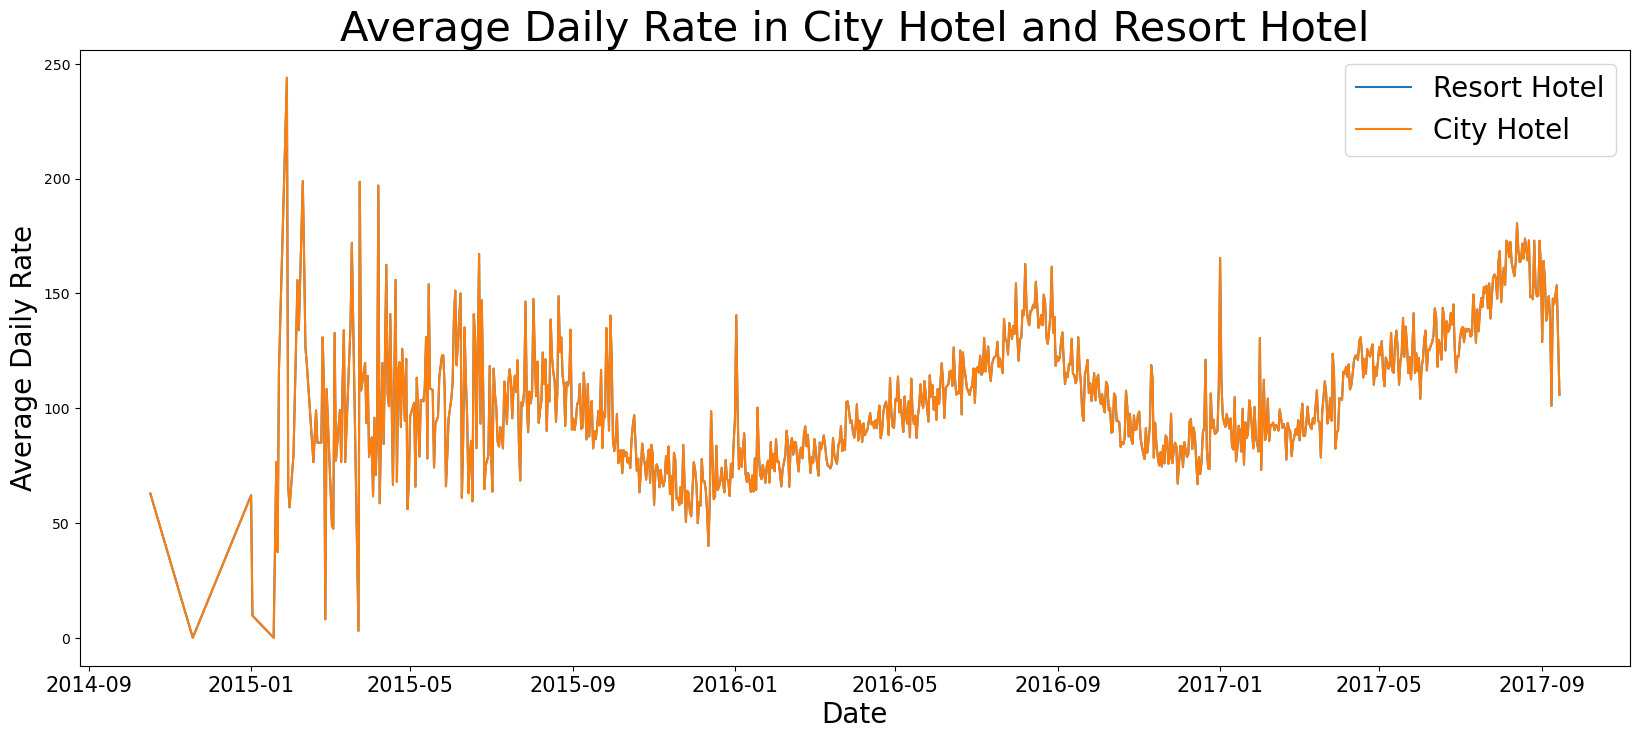

In [ ]:

#average daily rate for city hotel and resort hotel
plt.figure(figsize=(20, 8))
def display_hotel_adr_trends():
    plt.title('Average Daily Rate in City Hotel and Resort Hotel', fontsize=30)
    plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
    plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Average Daily Rate', fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

display_hotel_adr_trends()

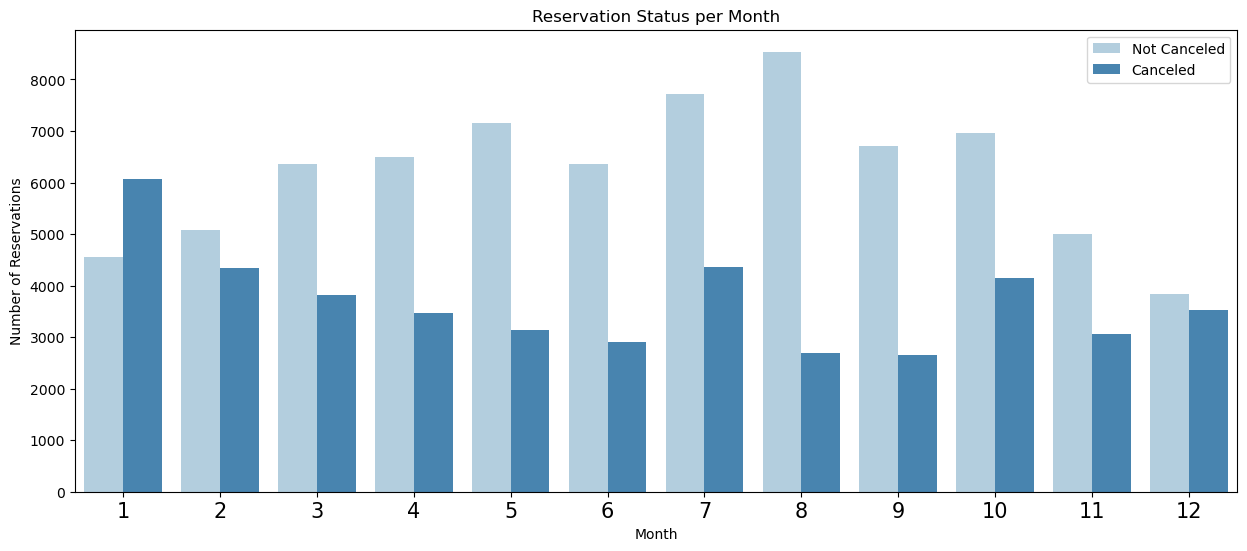

In [ ]:
#resevation status by  month
hotel_data['month'] = hotel_data['reservation_status_date'].dt.month
plt.figure(figsize=(15, 6))
ax1= sns.countplot(x='month', data=hotel_data, hue='is_canceled', palette='Blues')
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.title('Reservation Status per Month')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

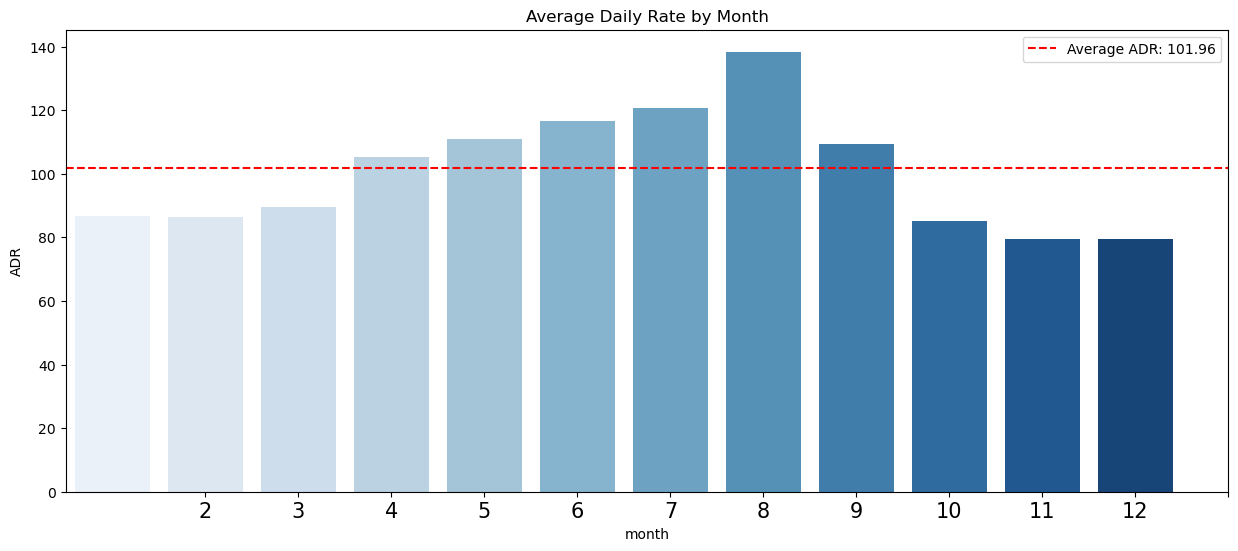

In [ ]:
# Calculate the average ADR (Average Daily Rate)
average_adr = hotel_data['adr'].mean()
sorted_months = hotel_data['month'].value_counts().index

# Plot the data (e.g., a bar plot of ADR by reservation status)
plt.figure(figsize=(15, 6))
sns.barplot(data=hotel_data, x='month', y='adr', ci=None, palette='Blues')

# Add a horizontal line for the average ADR
plt.axhline(average_adr, color='red', linestyle='--', label=f'Average ADR: {average_adr:.2f}')
plt.xticks(sorted_months)  # Ensure months are sorted correctly on the x-axis

# Add labels and legend
plt.title('Average Daily Rate by Month')
plt.xlabel('month')
plt.ylabel('ADR')
plt.legend()
plt.show()

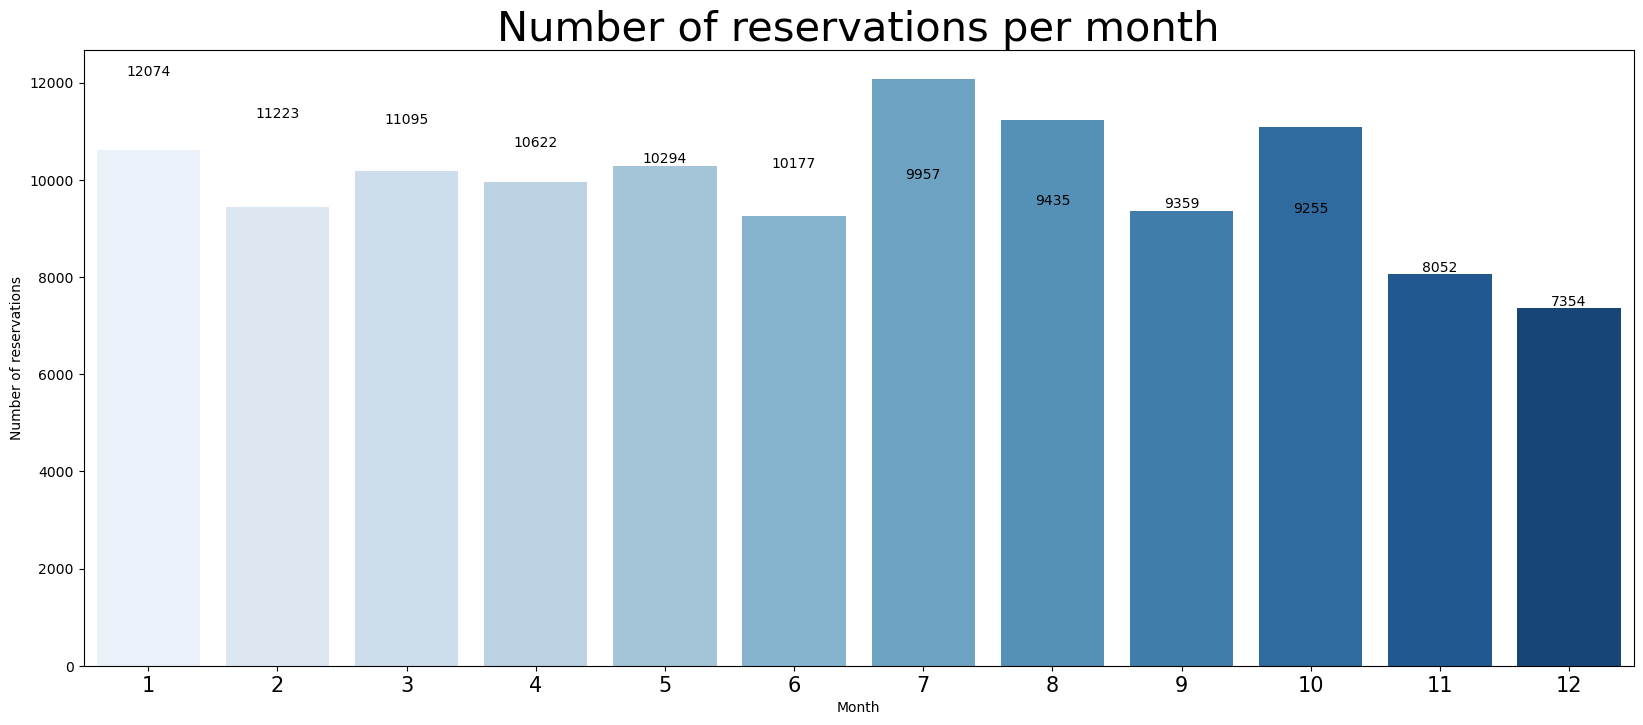

In [ ]:
#number of reservations per month
hotel_data['month'] = hotel_data['reservation_status_date'].dt.month
sorted_months = hotel_data['month'].value_counts().index
plt.figure(figsize=(20,8))
for i, value in enumerate (hotel_data['month'].value_counts()):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.title('Number of reservations per month', fontsize=30)
sns.countplot(data=hotel_data, x='month', palette='Blues')
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.show()

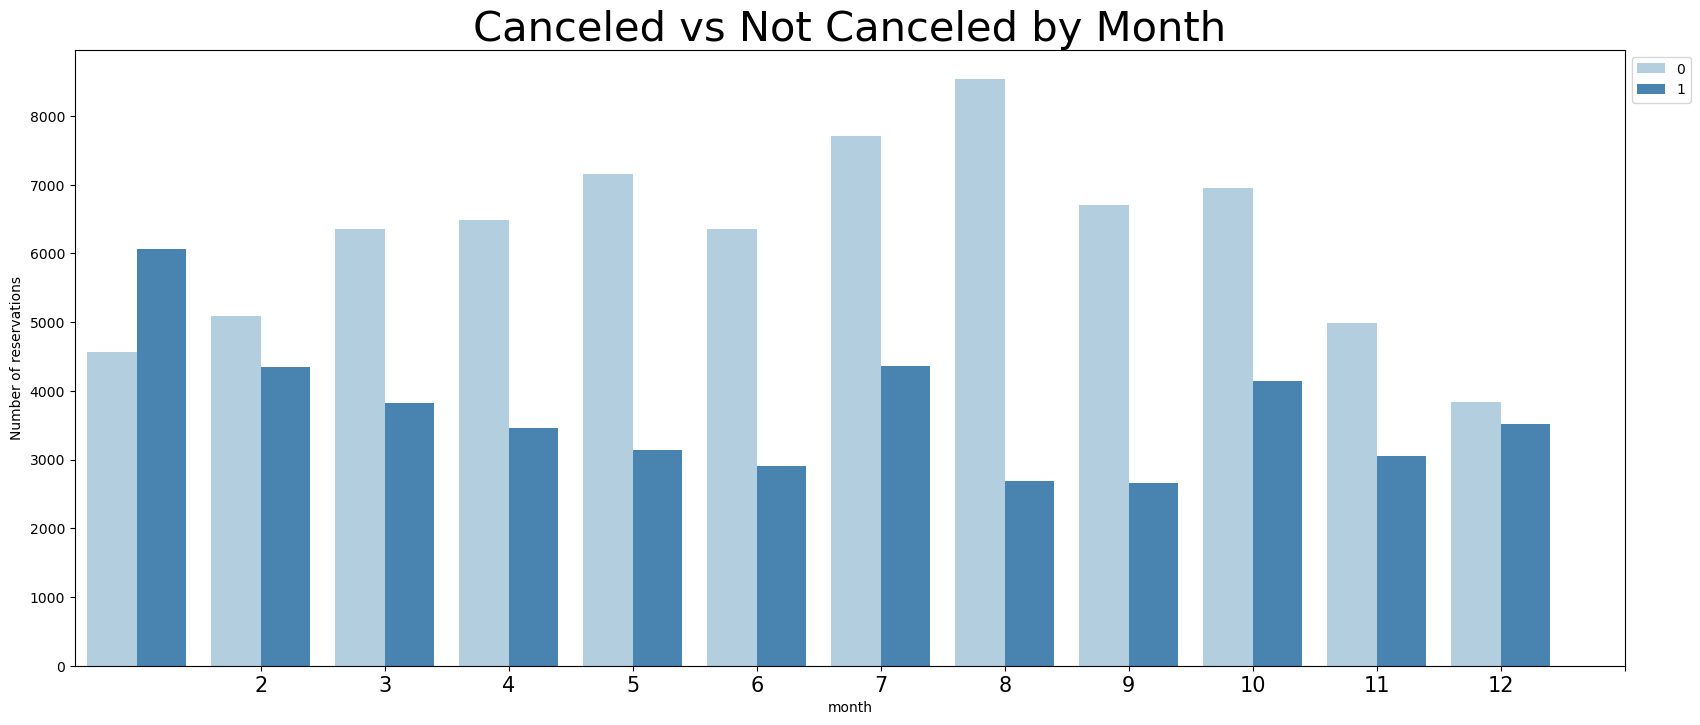

In [ ]:
#cancelation vs not cancelation by month

hotel_data['month']=hotel_data['reservation_status_date'].dt.month
plt.figure(figsize=(20,8))

ax1 = sns.countplot(data=hotel_data, x='month', hue='is_canceled', palette='Blues')
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(sorted_months)
plt.title('Canceled vs Not Canceled by Month', fontsize=30)
plt.xlabel('month')
plt.ylabel('Number of reservations')
plt.show()

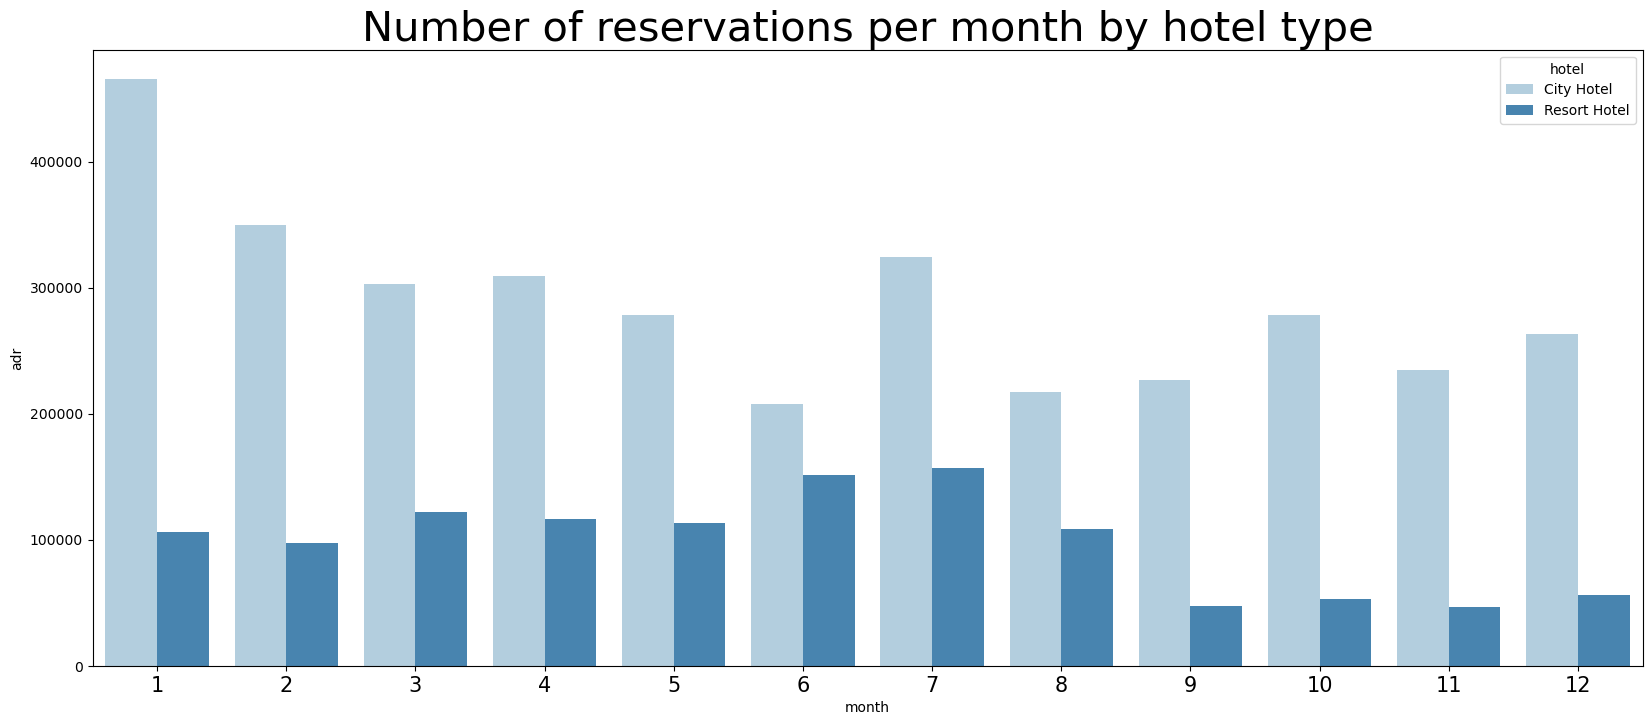

In [ ]:
#number of reservations per month by hotel type
plt.figure(figsize=(20,8))
plt.title('Number of reservations per month by hotel type', fontsize=30)

# Filter out rows with zero ADR
filtered_grouped_data = grouped_data[grouped_data['adr'] > 0]

sns.barplot(x='month', y='adr', hue='hotel', data=filtered_grouped_data, palette='Blues')
plt.show()

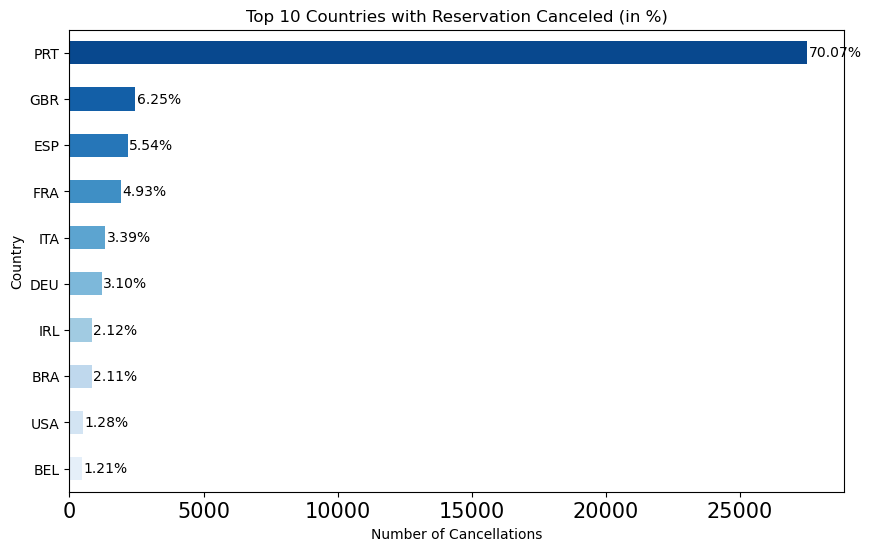

In [ ]:
#top 10 countries with the highest number of reservations status
def plot_cancellation_percentages():
    canceled_data = hotel_data[hotel_data['is_canceled'] == 1]
    top_10_countries = canceled_data['country'].value_counts().head(10)
    total_cancellations = top_10_countries.sum()
    percentages = (top_10_countries / total_cancellations) * 100

    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Countries with Reservation Canceled (in %)')
    top_10_countries.sort_values().plot(kind='barh', color=sns.color_palette("Blues", len(top_10_countries)))
    
    for index, value in enumerate(top_10_countries.sort_values()):
        percentage = percentages[top_10_countries.sort_values().index[index]]
        plt.text(value + 50, index, f'{percentage:.2f}%', va='center')

    plt.xlabel('Number of Cancellations')
    plt.ylabel('Country')
    plt.show()

plot_cancellation_percentages()

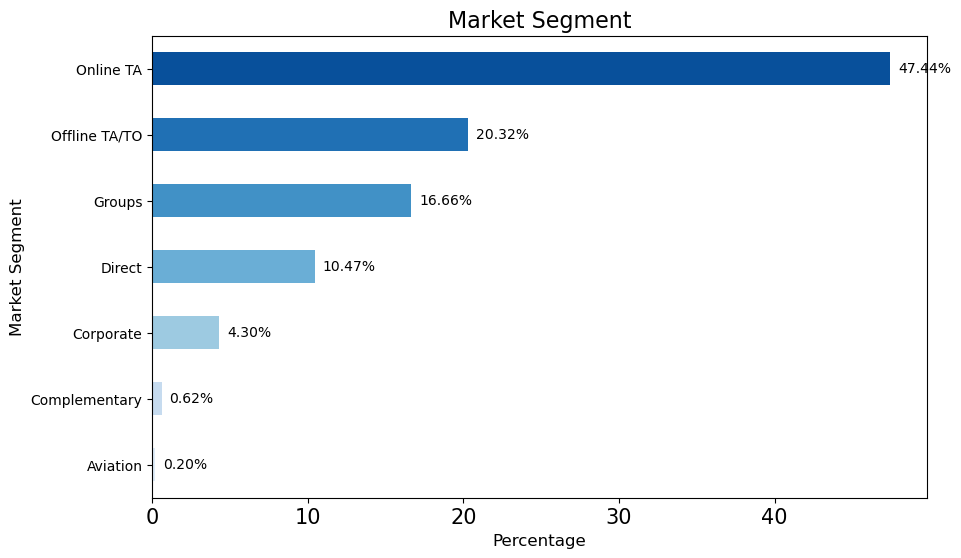

In [ ]:
# Calculate percentages
market_segment_counts = hotel_data['market_segment'].value_counts(normalize=True) * 100

# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
market_segment_counts.sort_values().plot(kind='barh', color=sns.color_palette("Blues", len(market_segment_counts)))
plt.title('Market Segment', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

#percentage labels
for index, value in enumerate(market_segment_counts.sort_values()):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()



In [ ]:
#the data for canceled reservations
canceled_data = hotel_data[hotel_data['is_canceled'] == 1]

# the top 10 countries with the most cancellations
top_10_countries = canceled_data['country'].value_counts().head(10)
print(top_10_countries)

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64


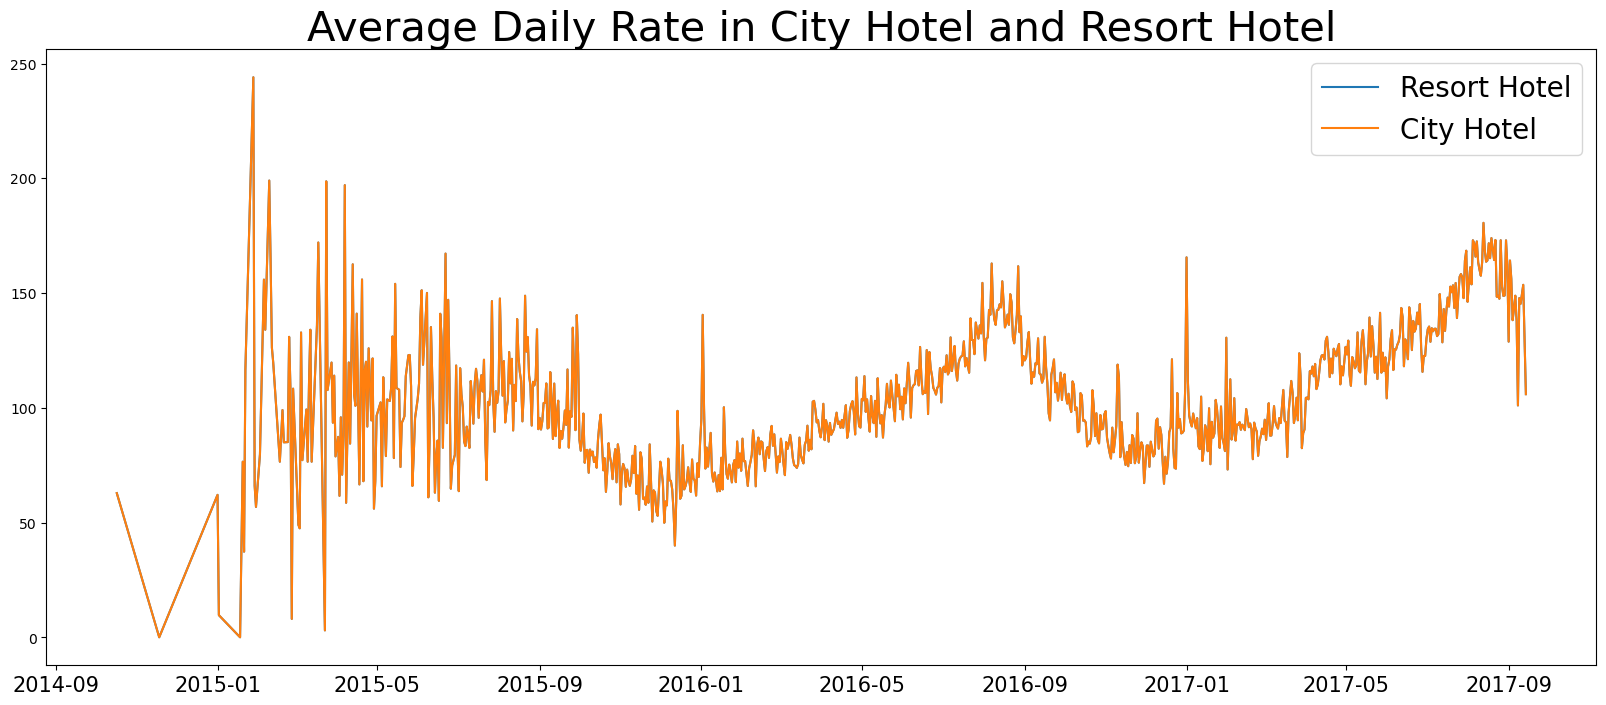

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City Hotel and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)
plt.show()

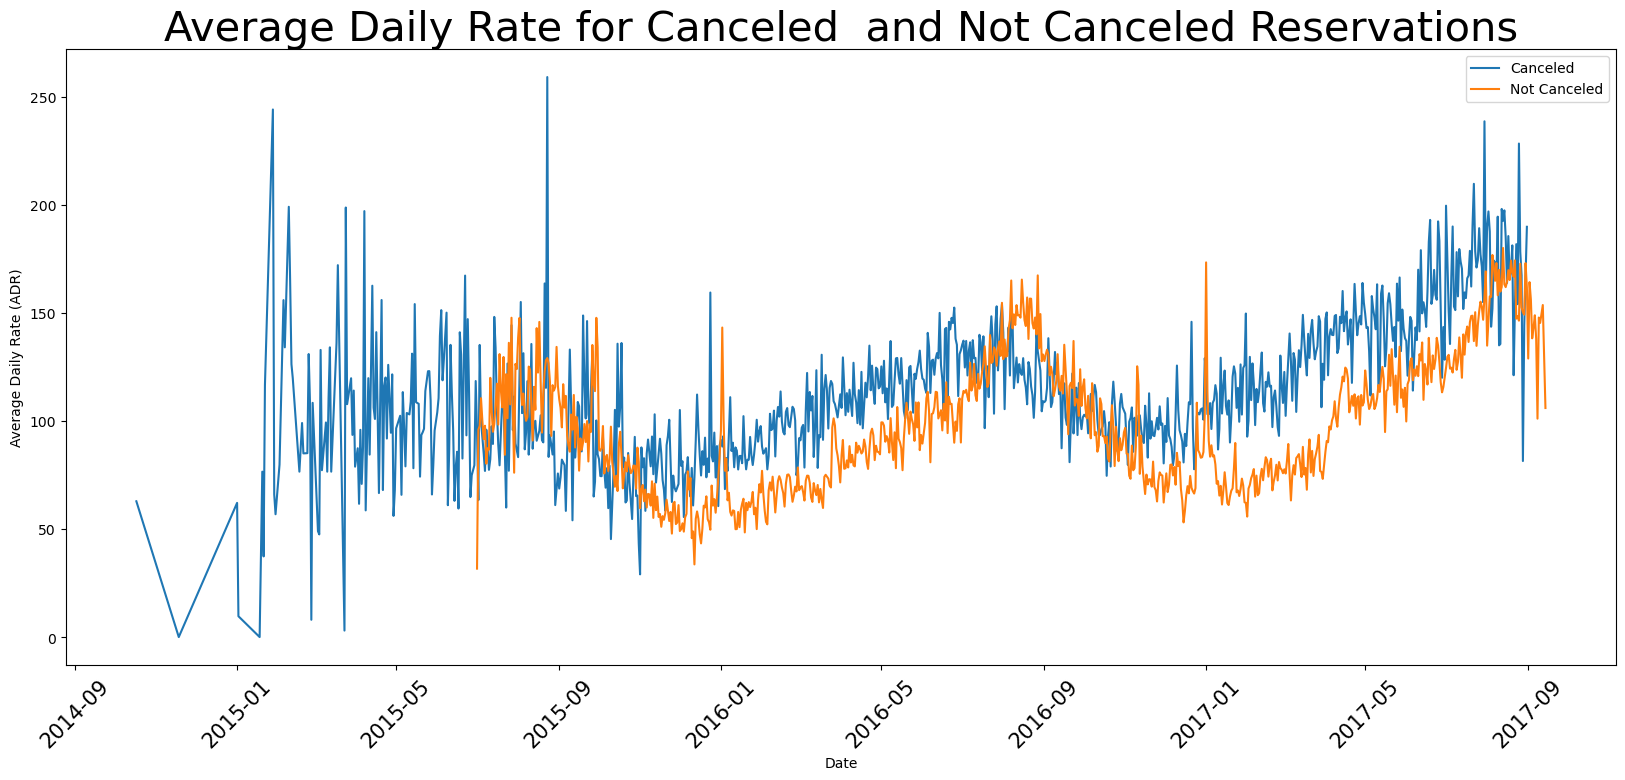

In [ ]:
#average daily rate from 2014 to 2017 by reservation status
canceled_data_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_adr = canceled_data_adr.reset_index()
canceled_data_adr.sort_values('reservation_status_date', inplace=True)

not_canceled_data = hotel_data[hotel_data['is_canceled'] == 0]
not_canceled_data_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_adr = not_canceled_data_adr.reset_index()
not_canceled_data_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate for Canceled  and Not Canceled Reservations', fontsize=30)
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='Canceled')
plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label='Not Canceled')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()





In [ ]:
#average daily rate from 2016 to 2017
canceled_data_adr = canceled_data_adr[(canceled_data_adr['reservation_status_date'] >= '2016') & (canceled_data_adr['reservation_status_date'] <= '2017')]
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date'] >= '2016') & (not_canceled_data_adr['reservation_status_date'] <= '2017')]

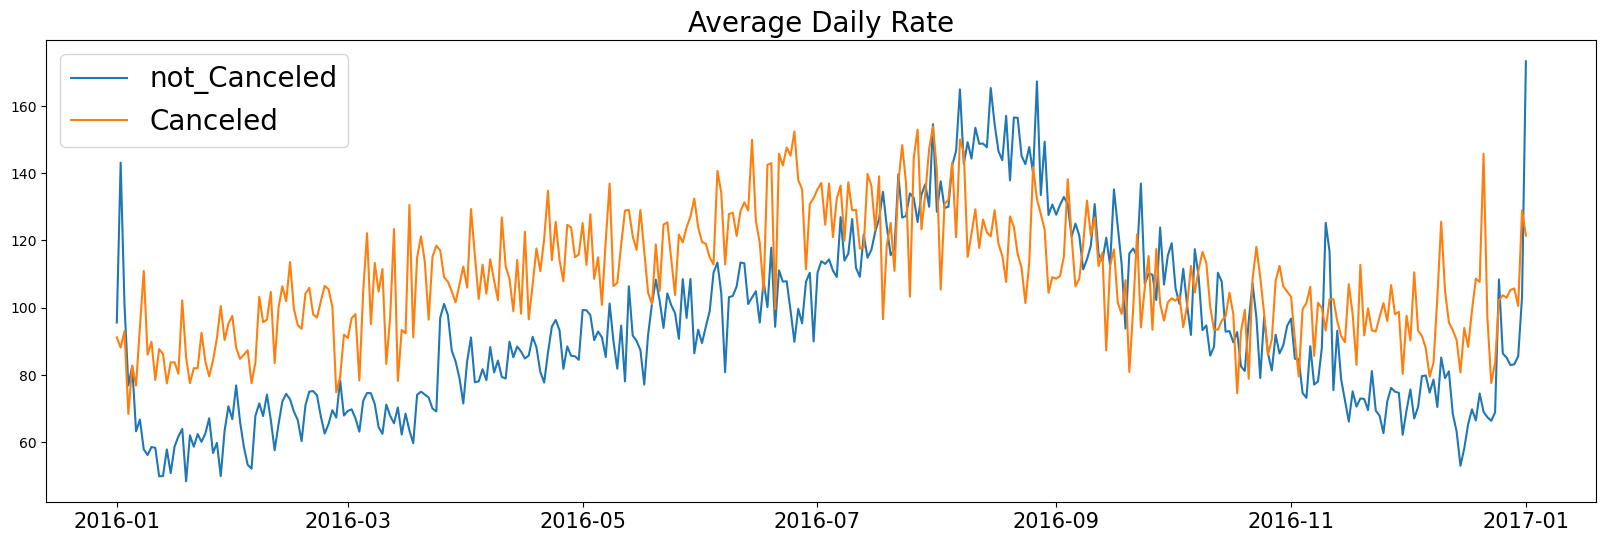

In [ ]:
#averge daily rate from 2016 to 2017
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', fontsize = 20)
plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label='not_Canceled')
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='Canceled')
plt.legend(fontsize=20)
plt.show()
